In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/NEW_time_series_data.csv')

# Check the first few rows of the dataset to understand its structure
df.head()


,Year,Month,new_deaths_per_million,Country,Date,GDP_per_Capita,Democracy score,Country_Codes
0,2020,1,0.0,Afghanistan,2020-01-22,512.055098,2.85,0
1,2020,1,0.0,Afghanistan,2020-01-23,512.055098,2.85,0
2,2020,1,0.0,Afghanistan,2020-01-24,512.055098,2.85,0
3,2020,1,0.0,Afghanistan,2020-01-25,512.055098,2.85,0
4,2020,1,0.0,Afghanistan,2020-01-26,512.055098,2.85,0


In [2]:

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Overview of the columns and data types
data_info = df.info()

# Drop rows with any missing values
df_cleaned = df.dropna()



Missing Values in Each Column:
 Year                         0
Month                        0
new_deaths_per_million       1
Country                      0
Date                         0
GDP_per_Capita            1119
Democracy score              0
Country_Codes                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107604 entries, 0 to 107603
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    107604 non-null  int64  
 1   Month                   107604 non-null  int64  
 2   new_deaths_per_million  107603 non-null  float64
 3   Country                 107604 non-null  object 
 4   Date                    107604 non-null  object 
 5   GDP_per_Capita          106485 non-null  float64
 6   Democracy score         107604 non-null  float64
 7   Country_Codes           107604 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 6.6

In [6]:
num_rows = df_cleaned.shape[0]
print(num_rows)


106484


In [7]:
# Convert 'Date' to datetime
df_cleaned['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
df_cleaned['Date'].dtype


<ipython-input-7-c7974d8db300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df['Date'])


dtype('<M8[ns]')

In [8]:
# Group by 'Country' and sum the COVID deaths
country_deaths = df_cleaned.groupby('Country')['new_deaths_per_million'].sum()

# Top 10 countries with the most COVID deaths
most_deaths_top_10 = country_deaths.sort_values(ascending=False).head(10)

# Top 10 countries with the least COVID deaths but greater than 1
least_deaths_top_10 = country_deaths[country_deaths > 1].sort_values(ascending=True).head(10)

# Display results
print("Top 10 countries with the most COVID-19 deaths per million:\n", most_deaths_top_10)
print("\nTop 10 countries with the least COVID-19 deaths per million (greater than 1):\n", least_deaths_top_10)



Top 10 countries with the most COVID-19 deaths per million:
 Country
Peru                      6073.169
Bulgaria                  4694.212
North Macedonia           4641.253
Bosnia and Herzegovina    4292.616
Hungary                   4154.863
Georgia                   3794.423
Montenegro                3781.014
Czechia                   3469.993
Moldova                   3433.238
Croatia                   3346.020
Name: new_deaths_per_million, dtype: float64

Top 10 countries with the least COVID-19 deaths per million (greater than 1):
 Country
Burundi         1.050
Bhutan          3.843
China           3.996
Chad           10.023
New Zealand    10.136
Niger          11.391
Tanzania       11.635
Benin          11.772
Tajikistan     12.268
Cuba           12.744
Name: new_deaths_per_million, dtype: float64


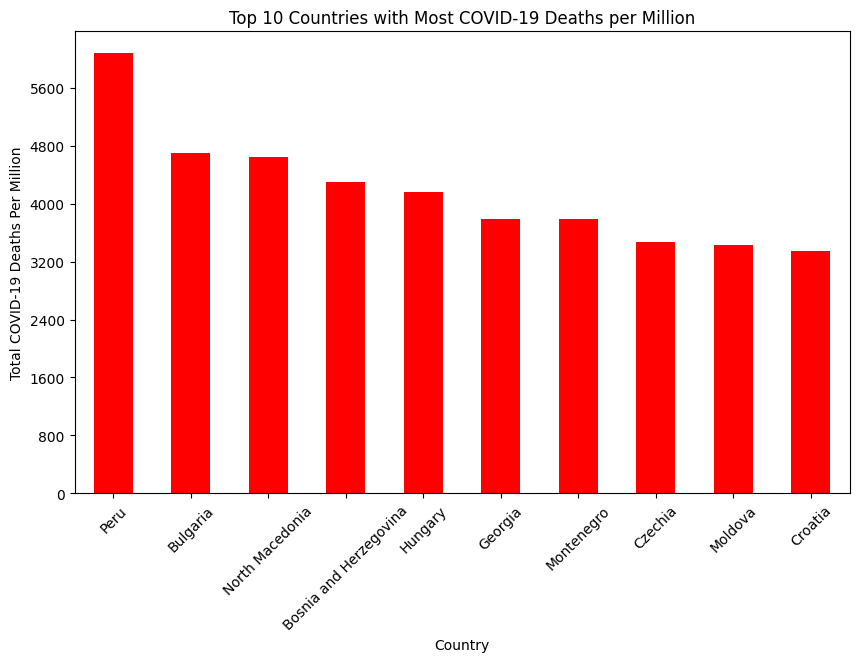

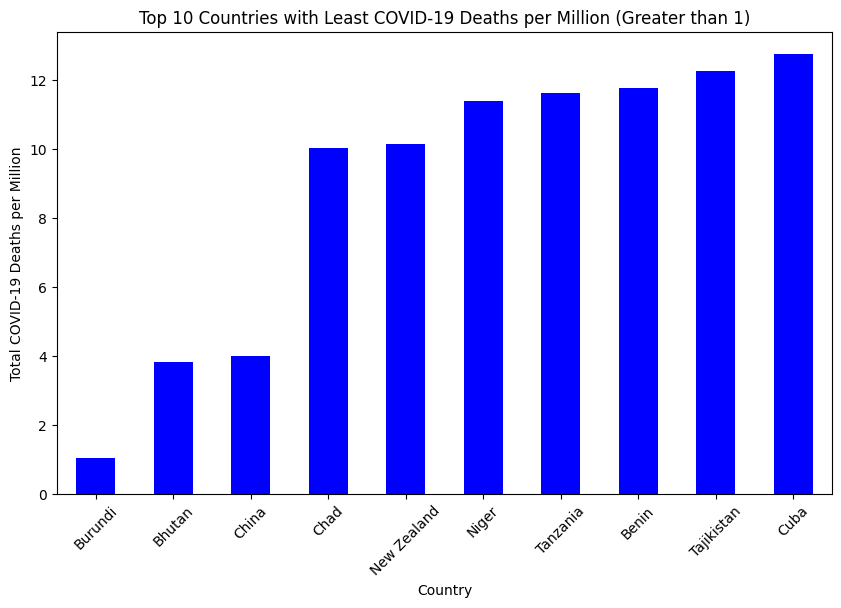

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot top 10 most deaths
plt.figure(figsize=(10, 6))
most_deaths_top_10.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Most COVID-19 Deaths per Million')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Deaths Per Million')
plt.xticks(rotation=45)

# Ensure that the y-axis shows all digits (no formatting)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Plot top 10 least deaths (greater than 1)
plt.figure(figsize=(10, 6))
least_deaths_top_10.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Least COVID-19 Deaths per Million (Greater than 1)')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Deaths per Million')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Calculate the average GDP per capita
average_gdp = df_cleaned['GDP_per_Capita'].mean()
print("Average GDP per capita:", average_gdp)

Average GDP per capita: 16313.544788443856


In [11]:
# Calculate correlation between GDP and COVID deaths
gdp_deaths = df_cleaned.groupby('Country').agg(
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean'),
    Total_Deaths=('new_deaths_per_million', 'sum')
).reset_index()
gdp_deaths_corr = gdp_deaths[['Average_GDP_Per_Capita', 'Total_Deaths']].corr().iloc[0, 1]
print("Correlation between GDP and COVID deaths per million:", gdp_deaths_corr)

Correlation between GDP and COVID deaths per million: 0.11473066953157061


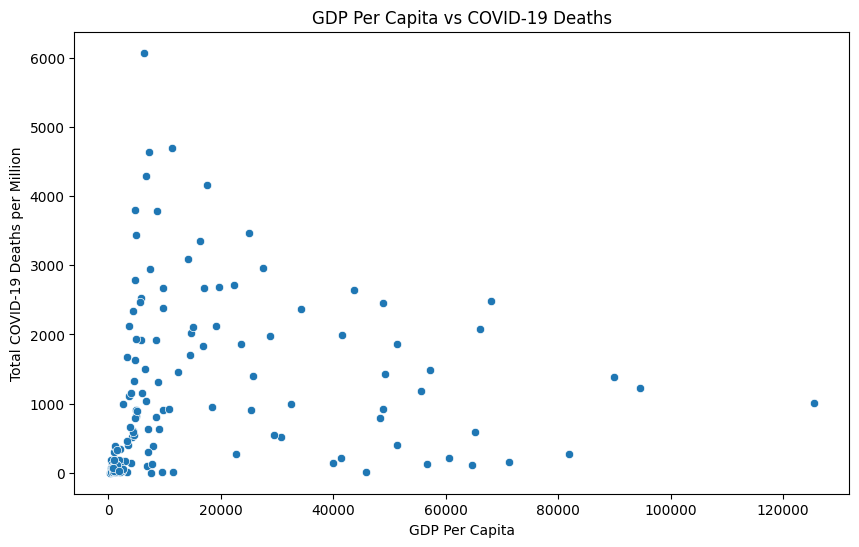

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot showing the relationship between GDP per capita and COVID deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_deaths, x='Average_GDP_Per_Capita', y='Total_Deaths')
plt.title('GDP Per Capita vs COVID-19 Deaths')
plt.xlabel('GDP Per Capita')
plt.ylabel('Total COVID-19 Deaths per Million')  # Adjust the label to show the actual count
plt.show()


<ipython-input-13-96a36caf5623>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_deaths = gdp_death.groupby('GDP_Category')['Total_Deaths'].mean().reset_index()
<ipython-input-13-96a36caf5623>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_deaths, x='GDP_Category', y='Total_Deaths', palette='coolwarm')


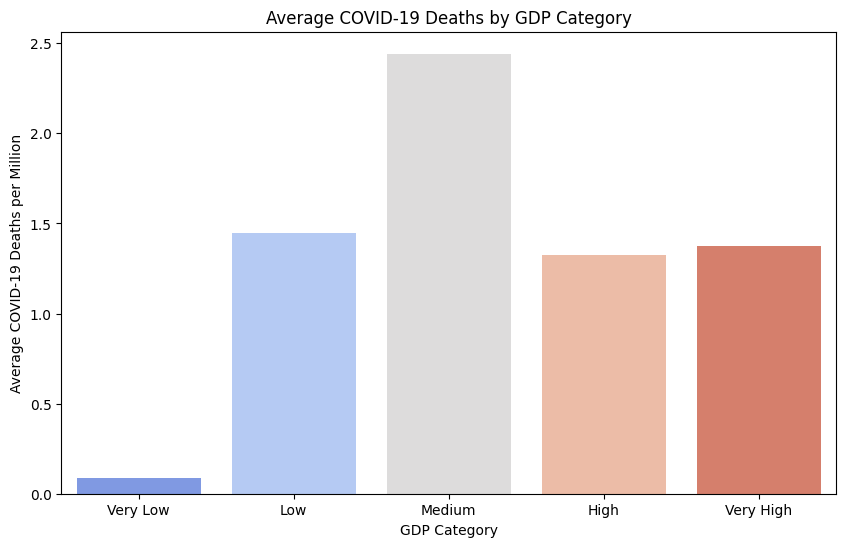

In [13]:


# Group by Country to calculate Average GDP per Capita and Total Deaths
gdp_death = df_cleaned.groupby('Country').agg(
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean'),
    Total_Deaths=('new_deaths_per_million', 'mean')
).reset_index()

# Define bins and labels for GDP categorization
bins = [0, 1000, 10000, 50000, 100000, 130000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Categorize GDP per capita
gdp_death['GDP_Category'] = pd.cut(gdp_death['Average_GDP_Per_Capita'], bins=bins, labels=labels, right=True)

# Calculate average deaths per GDP category
average_deaths = gdp_death.groupby('GDP_Category')['Total_Deaths'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_deaths, x='GDP_Category', y='Total_Deaths', palette='coolwarm')
plt.title('Average COVID-19 Deaths by GDP Category')
plt.xlabel('GDP Category')
plt.ylabel('Average COVID-19 Deaths per Million')  # Specify "Average"
plt.show()







In [14]:
# Calculate the average democracy score
average_democracy = df_cleaned['Democracy score'].mean()
print("Average democracy score:", average_democracy)

Average democracy score: 5.5441630540973295


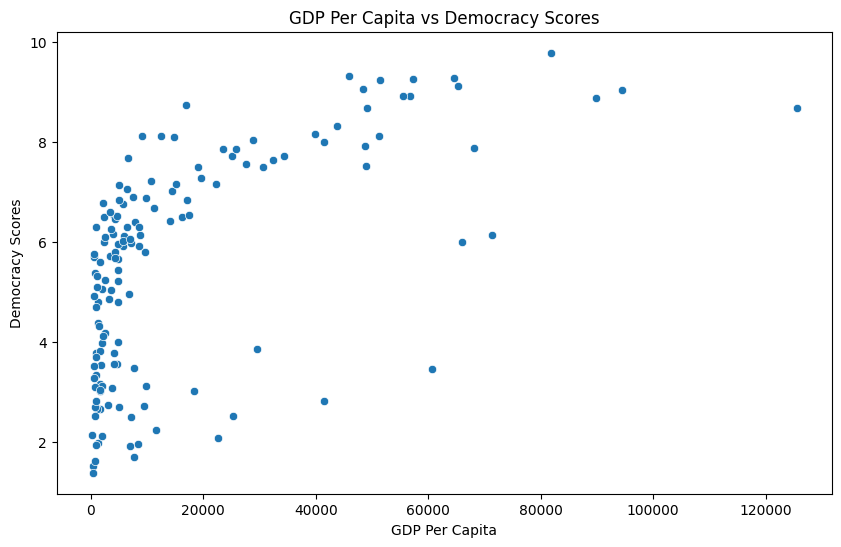

Correlation between GDP and Democracy Scores: 0.5841485505023103


In [15]:

# GDP per capita vs Democracy Scores
# Group by country
gdp_dem = df.groupby('Country').agg(
    Average_Democracy_Scores=('Democracy score', 'mean'),
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean')
).reset_index()
# print(df2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_dem, x='Average_GDP_Per_Capita', y='Average_Democracy_Scores')
plt.title('GDP Per Capita vs Democracy Scores')
plt.xlabel('GDP Per Capita')
plt.ylabel('Democracy Scores')
plt.show()

# Find correlation
gdp_dem_corr = gdp_dem[['Average_GDP_Per_Capita', 'Average_Democracy_Scores']].corr().iloc[0, 1]
print("Correlation between GDP and Democracy Scores:", gdp_dem_corr)




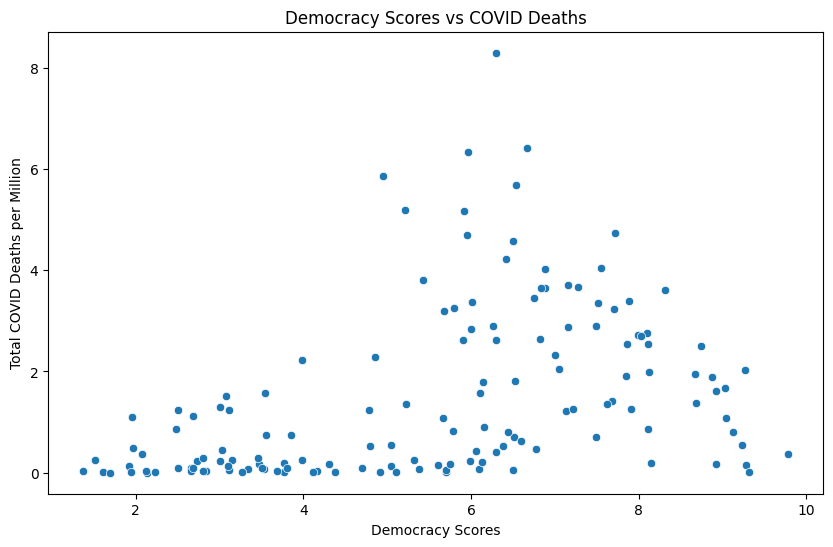

In [16]:
# Scatter plot for Democracy scores and COVID deaths
dem_deaths = df_cleaned.groupby('Country').agg(
    Democracy_Scores=('Democracy score', 'mean'),
    Total_Deaths=('new_deaths_per_million', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dem_deaths, x='Democracy_Scores', y='Total_Deaths')
plt.title('Democracy Scores vs COVID Deaths')
plt.xlabel('Democracy Scores')
plt.ylabel('Total COVID Deaths per Million')
plt.show()


<ipython-input-17-96ae144feef5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_dem_deaths = dem_deaths.groupby('Democracy_Category').agg(
<ipython-input-17-96ae144feef5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_dem_deaths, x='Democracy_Category', y='Total_Deaths', palette='coolwarm')


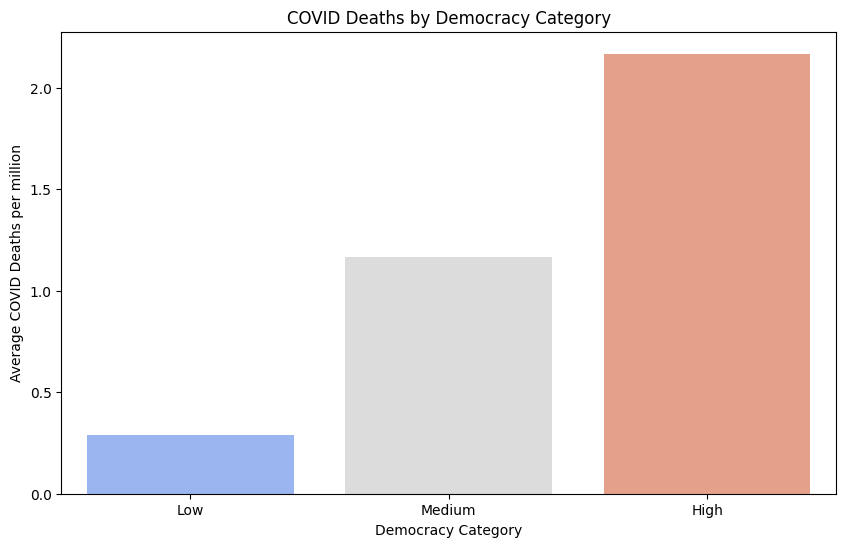

In [17]:

# Categorize Democracy Scores into Low, Medium, and High
bins = [0, 3, 6, 10]
labels = ['Low', 'Medium', 'High']
dem_deaths['Democracy_Category'] = pd.cut(dem_deaths['Democracy_Scores'], bins=bins, labels=labels, right=True)

# Group by Democracy Category to calculate total deaths
grouped_dem_deaths = dem_deaths.groupby('Democracy_Category').agg(
    Total_Deaths=('Total_Deaths', 'mean'),
).reset_index()

# Create the bar plot for Total COVID Deaths by Democracy Category
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_dem_deaths, x='Democracy_Category', y='Total_Deaths', palette='coolwarm')
plt.title('COVID Deaths by Democracy Category')
plt.xlabel('Democracy Category')
plt.ylabel('Average COVID Deaths per million')
plt.show()





In [ ]:
# answering the last question with a new dataset

<ipython-input-18-4baac74ee65f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year
<ipython-input-18-4baac74ee65f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month


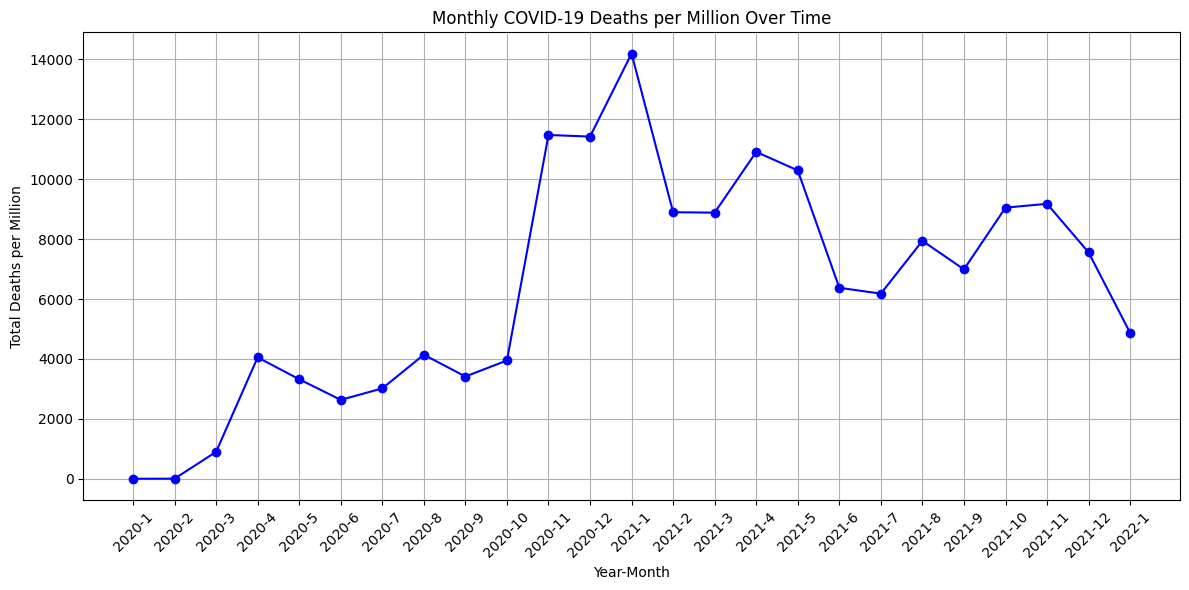

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Extract Year and Month from the Date
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Step 3: Group by Year and Month to get monthly deaths
monthly_deaths = df_cleaned.groupby(['Year', 'Month'])['new_deaths_per_million'].sum().reset_index()

# Create a new column 'YearMonth' to help with plotting
monthly_deaths['YearMonth'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths['YearMonth'], monthly_deaths['new_deaths_per_million'], marker='o', linestyle='-', color='blue')
plt.title('Monthly COVID-19 Deaths per Million Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths per Million')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-19-fb9c1449a36d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year
<ipython-input-19-fb9c1449a36d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month


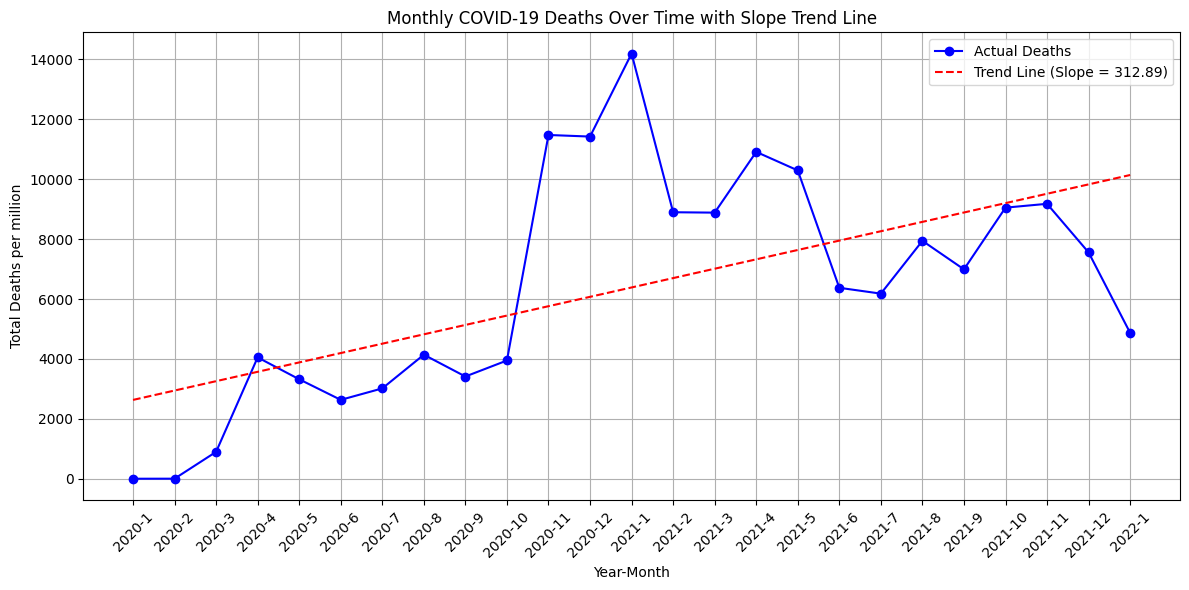

The slope of the trend line is: 312.89 deaths per month


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Extract Year and Month
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Step 3: Group by Year and Month and aggregate deaths
monthly_deaths = df_cleaned.groupby(['Year', 'Month'])['new_deaths_per_million'].sum().reset_index()
monthly_deaths['YearMonth'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str)

# Step 4: Calculate the time index for fitting the slope
monthly_deaths['Time_Index'] = np.arange(len(monthly_deaths))

# Step 5: Fit a linear model and get the slope using numpy's polyfit
slope, intercept = np.polyfit(monthly_deaths['Time_Index'], monthly_deaths['new_deaths_per_million'], 1)

# Step 6: Plot the data and the trend line
plt.figure(figsize=(12, 6))

# Plot the actual deaths
plt.plot(monthly_deaths['YearMonth'], monthly_deaths['new_deaths_per_million'], label='Actual Deaths', color='blue', marker='o')

# Plot the trend line using the slope
plt.plot(monthly_deaths['YearMonth'], intercept + slope * monthly_deaths['Time_Index'], label=f'Trend Line (Slope = {slope:.2f})', color='red', linestyle='--')

# Adding labels and title
plt.title('Monthly COVID-19 Deaths Over Time with Slope Trend Line')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths per million')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Display the slope
print(f"The slope of the trend line is: {slope:.2f} deaths per month")
